## Objetivo da Análise Exploratória  
O objetivo deste notebook é realizar uma análise exploratória detalhada do conjunto de dados "tabela_big_data_ft_falhas.csv". Esta análise visa compreender as características principais dos dados, identificar possíveis inconsistências ou lacunas, e extrair insights que possam fundamentar investigações mais aprofundadas ou direcionar a modelagem preditiva. Em especial, focaremos em analisar a distribuição das falhas, possíveis correlações entre variáveis e identificar padrões que possam auxiliar na mitigação de ocorrências futuras.

## Introdução  
A Análise Exploratória de Dados (AED) é uma etapa fundamental no processo de análise, pois permite um primeiro contato estruturado com os dados, ajudando os analistas a compreenderem sua estrutura e relevância. Este notebook aborda o conjunto de dados "tabela_big_data_ft_falhas.csv", o qual armazena informações sobre falhas que ocorrem em um sistema de infraestrutura ou operação.

O conjunto de dados contém diversas colunas que detalham o tipo de falha, o horário do evento, e outras variáveis relacionadas a cada ocorrência. A análise dessas informações permitirá a identificação de padrões e tendências, além da criação de hipóteses para futuras investigações.

As etapas abordadas nesta análise incluem:

1. **Carregamento e pré-processamento dos dados:** Importação dos dados, tratamento de valores ausentes ou inconsistentes e ajustes necessários.
2. **Análise descritiva:** Estatísticas e visualizações básicas para entendimento geral dos dados.
3. **Identificação de padrões:** Avaliação das relações entre variáveis e identificação de tendências ou agrupamentos.



## Import do dataframe:

In [ ]:
%pip install -U pandas matplotlib seaborn pyarrow


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df = pd.read_csv(
    'tabela_big_data_ft_falhas.csv',
    sep='\t',
    encoding='cp1252',
    on_bad_lines='skip',  
    decimal=',',          
)

In [3]:
df

,'NR_SAF','NR_ANO','ID_CCO_SAF','ID_FT_FALHA','ID_DT_FALHA','ID_DT_FALHA_LIBERADO','TEMPO_LIBERACAO','HORA_FALHA','LOCALIDADE','TRECHO',...,'ID_EQUIPAMENTO','ID_GARANTIA','TX_GARANTIA','TEMPO_ATENDIMENTO_2','TEMPO_INDISPONIVEL_2','TEMPO_LIBERACAO_2','TEMPO_REPARO_LIB_2','TEMPO_REPARO_TOTAL_2','NR_TEMPO_ACESSO','DIM_ATUACAO_SK'
0,4826,2019,2,482620192,'20190120','20190120',",07",",188137",'LOCALIDADE 01184','TRECHO 00299',...,97169.0,2.0,'NÃO',NaN,NaN,NaN,NaN,NaN,0.06,NaN
1,4826,2020,1,482620201,'20200121','20200121',",08",",047963",'LOCALIDADE 00823','TRECHO 00312',...,114889.0,2.0,'NÃO',NaN,NaN,NaN,NaN,NaN,0.06,NaN
2,4826,2021,1,482620211,'20210123','',NaN,",922060",'LOCALIDADE 01036','TRECHO 00482',...,0.0,0.0,'FALHA NÃO LIBERADA/ABERTA',NaN,NaN,NaN,NaN,NaN,2.44,NaN
3,4826,2022,3,482620223,'20220124','',NaN,",228472",'LOCALIDADE 00950','TRECHO 00382',...,0.0,0.0,'FALHA NÃO LIBERADA/ABERTA',NaN,NaN,NaN,NaN,NaN,0.12,NaN
4,4826,2024,1,482620241,'20240201','20240208',"6,81",",234722",'LOCALIDADE 01326','TRECHO 00474',...,118784.0,2.0,'NÃO',NaN,NaN,NaN,NaN,NaN,6.79,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1612822,73463,2014,3,7346320143,'20141017','20141017',",12",",840972",'LOCALIDADE 00949','TRECHO 00382',...,108188.0,2.0,'NÃO',NaN,NaN,NaN,NaN,NaN,0.11,NaN
1612823,73463,2015,1,7346320151,'20151012','20151012',",14",",647917",'LOCALIDADE 01404','TRECHO 00286',...,89910.0,2.0,'NÃO',NaN,NaN,NaN,NaN,NaN,0.10,NaN
1612824,73463,2016,2,7346320162,'20161108','20161108',",04",",767361",'LOCALIDADE 01379','TRECHO 00385',...,79511.0,2.0,'NÃO',NaN,NaN,NaN,NaN,NaN,0.02,NaN
1612825,73463,2017,2,7346320172,'20171208','20171209',",88",",248611",'LOCALIDADE 01187','TRECHO 00317',...,97796.0,1.0,'SIM',NaN,NaN,NaN,NaN,NaN,0.65,NaN


## Informações básicas sobre o dataframe:

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1612827 entries, 0 to 1612826
Data columns (total 50 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   'NR_SAF'                  1612561 non-null  object 
 1   'NR_ANO'                  1587666 non-null  object 
 2   'ID_CCO_SAF'              1582881 non-null  object 
 3   'ID_FT_FALHA'             1582668 non-null  object 
 4   'ID_DT_FALHA'             1582661 non-null  object 
 5   'ID_DT_FALHA_LIBERADO'    1582660 non-null  object 
 6   'TEMPO_LIBERACAO'         1482946 non-null  object 
 7   'HORA_FALHA'              1582659 non-null  object 
 8   'LOCALIDADE'              1582663 non-null  object 
 9   'TRECHO'                  1582666 non-null  object 
 10  'AVARIA'                  1582672 non-null  object 
 11  'SISTEMA'                 1582672 non-null  object 
 12  'ATUACAO'                 1582673 non-null  object 
 13  'CAUSA'                   1

Checando a quantidade de valores nulos em cada coluna do dataframe:

In [5]:
missing_values = df.isnull().sum()
missing_values

'NR_SAF'                        266
'NR_ANO'                      25161
'ID_CCO_SAF'                  29946
'ID_FT_FALHA'                 30159
'ID_DT_FALHA'                 30166
'ID_DT_FALHA_LIBERADO'        30167
'TEMPO_LIBERACAO'            129881
'HORA_FALHA'                  30168
'LOCALIDADE'                  30164
'TRECHO'                      30161
'AVARIA'                      30155
'SISTEMA'                     30155
'ATUACAO'                     30154
'CAUSA'                       30154
'DESC_AVARIA'                 30159
'DESC_CAUSA'                  70562
'DESC_ATUACAO'                76909
'SITUACAO_FALHA'              78683
'ID_HORA'                     78699
'FL_EQUIPAMENTO_DISP'         78708
'TEMPO_REPARO_LIB'            78711
'TEMPO_REPARO_TOTAL'          78710
'TX_POSICAO_FALHA'            78717
'TX_POSICAO_OSM'              78712
'TX_CARRO_AVAR_FALHA'         82402
'TX_CARRO_AVAR_OSM'           78712
'TX_CARRO_COMANDO_FALHA'      78712
'TX_CARRO_COMANDO_OSM'      

Número de valores únicos em cada coluna do dataframe:

In [6]:
df.nunique()

'NR_SAF'                     123007
'NR_ANO'                      27366
'ID_CCO_SAF'                  24943
'ID_FT_FALHA'               1534229
'ID_DT_FALHA'                  8200
'ID_DT_FALHA_LIBERADO'         8224
'TEMPO_LIBERACAO'             29982
'HORA_FALHA'                  79094
'LOCALIDADE'                   2953
'TRECHO'                       2566
'AVARIA'                       3359
'SISTEMA'                      2426
'ATUACAO'                      1221
'CAUSA'                        1088
'DESC_AVARIA'               1360055
'DESC_CAUSA'                 776448
'DESC_ATUACAO'               836621
'SITUACAO_FALHA'               5758
'ID_HORA'                      8873
'FL_EQUIPAMENTO_DISP'         35038
'TEMPO_REPARO_LIB'            34530
'TEMPO_REPARO_TOTAL'           3366
'TX_POSICAO_FALHA'             8942
'TX_POSICAO_OSM'              15080
'TX_CARRO_AVAR_FALHA'          5686
'TX_CARRO_AVAR_OSM'            4131
'TX_CARRO_COMANDO_FALHA'       5023
'TX_CARRO_COMANDO_OSM'      

## Graficos e insights do dataset

In [7]:
print(df.columns)

Index([''NR_SAF'', ''NR_ANO'', ''ID_CCO_SAF'', ''ID_FT_FALHA'',
       ''ID_DT_FALHA'', ''ID_DT_FALHA_LIBERADO'', ''TEMPO_LIBERACAO'',
       ''HORA_FALHA'', ''LOCALIDADE'', ''TRECHO'', ''AVARIA'', ''SISTEMA'',
       ''ATUACAO'', ''CAUSA'', ''DESC_AVARIA'', ''DESC_CAUSA'',
       ''DESC_ATUACAO'', ''SITUACAO_FALHA'', ''ID_HORA'',
       ''FL_EQUIPAMENTO_DISP'', ''TEMPO_REPARO_LIB'', ''TEMPO_REPARO_TOTAL'',
       ''TX_POSICAO_FALHA'', ''TX_POSICAO_OSM'', ''TX_CARRO_AVAR_FALHA'',
       ''TX_CARRO_AVAR_OSM'', ''TX_CARRO_COMANDO_FALHA'',
       ''TX_CARRO_COMANDO_OSM'', ''TX_COMPOSICAO_FALHA'',
       ''TX_COMPOSICAO_OSM'', ''TEMPO_ATENDIMENTO'', ''AGENTE_CAUSADOR'',
       ''ID_NIVEL'', ''DT_TERMINO_INTERVENCAO'', ''DT_MODIFICACAO'',
       ''TX_LOCAL_FIM'', ''TX_LOCAL_INI'', ''TEMPO_INDISPONIVEL'',
       ''HORA_LIBERADO_FALHA'', ''DIM_EQUIP_TAG_SK'', ''ID_EQUIPAMENTO'',
       ''ID_GARANTIA'', ''TX_GARANTIA'', ''TEMPO_ATENDIMENTO_2'',
       ''TEMPO_INDISPONIVEL_2'', ''TEMPO_LIBERACA

In [9]:
# Remove the extra quotes from the column names
df.columns = df.columns.str.replace("'", "").str.strip()


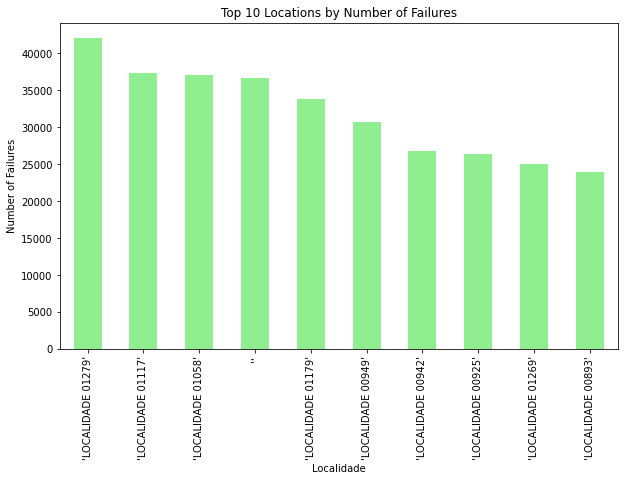

In [10]:
failures_by_location = df['LOCALIDADE'].value_counts().head(10)
failures_by_location.plot(kind='bar', figsize=(10, 6), color='lightgreen')
plt.title('Top 10 Locations by Number of Failures')
plt.xlabel('Localidade')
plt.ylabel('Number of Failures')
plt.show()


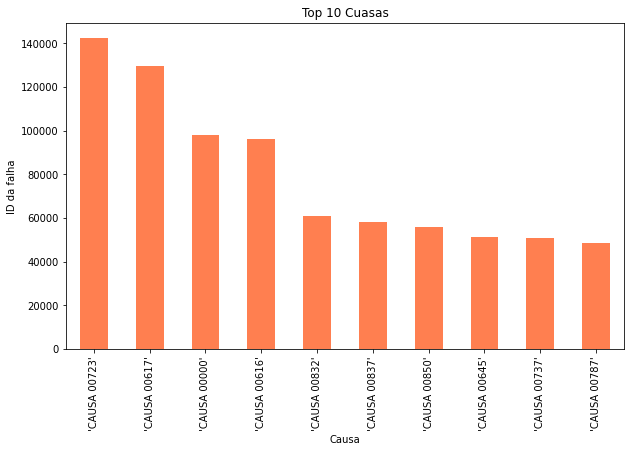

In [11]:
failures_by_cause = df['CAUSA'].value_counts().head(10)

failures_by_cause.plot(kind='bar', figsize=(10, 6), color='coral')
plt.title('Top 10 Cuasas')
plt.xlabel('Causa')
plt.ylabel('ID da falha')
plt.show()

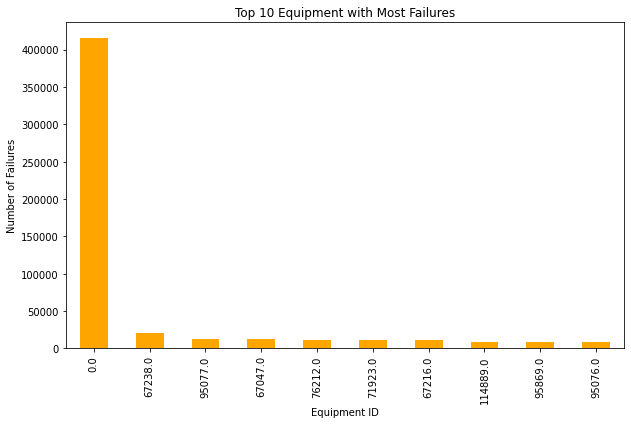

In [18]:

failures_by_equipment = df['ID_EQUIPAMENTO'].value_counts().head(10)
failures_by_equipment.plot(kind='bar', figsize=(10, 6), color='orange')
plt.title('Top 10 ID Equipamento falhas')
plt.xlabel('Equipamento')
plt.ylabel('Numero de falhas')
plt.show()


## Correlação:

In [12]:
df = df.apply(pd.to_numeric, errors='coerce')
df.head()


,NR_SAF,NR_ANO,ID_CCO_SAF,ID_FT_FALHA,ID_DT_FALHA,ID_DT_FALHA_LIBERADO,TEMPO_LIBERACAO,HORA_FALHA,LOCALIDADE,TRECHO,...,ID_EQUIPAMENTO,ID_GARANTIA,TX_GARANTIA,TEMPO_ATENDIMENTO_2,TEMPO_INDISPONIVEL_2,TEMPO_LIBERACAO_2,TEMPO_REPARO_LIB_2,TEMPO_REPARO_TOTAL_2,NR_TEMPO_ACESSO,DIM_ATUACAO_SK
0,4826.0,2019.0,2.0,482620192.0,NaN,NaN,NaN,NaN,NaN,NaN,...,97169.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,0.06,NaN
1,4826.0,2020.0,1.0,482620201.0,NaN,NaN,NaN,NaN,NaN,NaN,...,114889.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,0.06,NaN
2,4826.0,2021.0,1.0,482620211.0,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2.44,NaN
3,4826.0,2022.0,3.0,482620223.0,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.12,NaN
4,4826.0,2024.0,1.0,482620241.0,NaN,NaN,NaN,NaN,NaN,NaN,...,118784.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,6.79,NaN


In [13]:
df_numeric = df.select_dtypes(include=[float, int])
correlation_matrix = df_numeric.corr()
high_corr = correlation_matrix[(correlation_matrix > 0.5) & (correlation_matrix != 1)].stack()
high_corr

NR_SAF                  ID_FT_FALHA               1.000000
                        ID_DT_FALHA_LIBERADO      0.607553
                        TX_CARRO_COMANDO_OSM      0.598239
NR_ANO                  FL_EQUIPAMENTO_DISP       0.692872
                        ID_GARANTIA               0.739232
ID_FT_FALHA             NR_SAF                    1.000000
                        TX_CARRO_AVAR_OSM         0.636378
ID_DT_FALHA_LIBERADO    NR_SAF                    0.607553
                        TEMPO_LIBERACAO           0.623782
TEMPO_LIBERACAO         ID_DT_FALHA_LIBERADO      0.623782
                        TX_COMPOSICAO_FALHA       0.816566
HORA_FALHA              TX_COMPOSICAO_FALHA       0.780561
AVARIA                  TEMPO_ATENDIMENTO         0.968305
                        ID_NIVEL                  0.740675
                        DT_TERMINO_INTERVENCAO    0.974355
SISTEMA                 DT_TERMINO_INTERVENCAO    0.603083
ATUACAO                 DT_MODIFICACAO            0.6223

In [ ]:
df.to_parquet('tabela_big_data_ft_falhas.csv', engine='pyarrow')

## Hipóteses  
Com base nos dados e no escopo do conjunto de falhas, levantamos as seguintes hipóteses iniciais:

1. **A categoria de falhas relacionadas à infraestrutura representa a maior quantidade de ocorrências:** Espera-se que as falhas de infraestrutura constituam a maior parte dos eventos, o que indicaria uma necessidade de melhorias estruturais e manutenção mais frequente.

2. **A frequência de falhas aumenta em horários de pico (7:00-9:00 e 17:00-19:00):** Essa hipótese sugere que o volume de usuários nesses horários exerce maior pressão sobre o sistema, aumentando a probabilidade de falhas.

3. **Falhas em pontos de baldeação ou conexões entre rotas são mais frequentes:** Locais onde há transferências ou confluência de fluxos tendem a ser mais suscetíveis a falhas devido ao aumento da complexidade operacional.

4. **A falta de descrição detalhada das falhas está concentrada em eventos noturnos:** A hipótese é que, durante períodos de menor movimento, as falhas possam estar sendo relatadas com menos detalhes.

Essas hipóteses servirão de guia para a análise e permitirão direcionar o foco para áreas de maior impacto.